In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./3 factor model.csv')

In [6]:
df.head()

,date,rp,smb,hml
0,2010-06,-0.005425,-0.022460,-0.017384
1,2010-07,0.162575,-0.021099,-0.017665
2,2010-08,0.062575,0.056949,-0.048049
3,2010-09,0.058575,-0.033963,-0.014599
4,2010-10,0.097408,-0.023304,0.026015


In [7]:
df.tail()

,date,rp,smb,hml
104,2019-02,0.157083,-0.005058,-0.016722
105,2019-03,0.028083,-0.002605,-0.066609
106,2019-04,-0.014917,-0.023181,-0.034975
107,2019-05,-0.075917,-0.006805,0.017810
108,2019-06,0.024083,-0.017670,-0.049025


In [8]:
small_df = df[np.isin(df['date'], ['2015-06', '2015-08', '2015-09', '2015-05', '2012-01', '2015-01', '2015-10', '2019-02', '2018-11', '2014-03'])]

In [9]:
small_df

,date,rp,smb,hml
19,2012-01,0.039417,-0.007358,-0.001751
45,2014-03,-0.023167,-0.013719,-0.001034
55,2015-01,0.001042,0.017836,-0.052602
59,2015-05,0.147458,0.264653,0.078425
60,2015-06,-0.111333,-0.017122,0.058578
62,2015-08,-0.172125,0.000786,-0.024749
63,2015-09,-0.004125,-0.008040,-0.043683
64,2015-10,0.137083,0.070223,-0.044211
101,2018-11,0.002083,0.013464,-0.039567
104,2019-02,0.157083,-0.005058,-0.016722


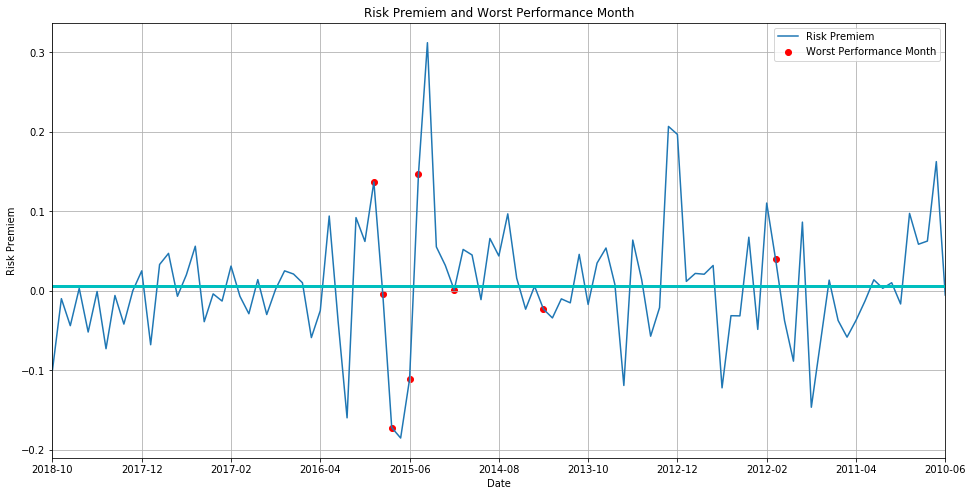

In [10]:
fig = plt.figure(figsize=(16,8))

plt.xlim(100)
col = 'rp'
plt.plot(df['date'],df[col], label='Risk Premiem')
plt.scatter(small_df['date'], small_df[col], color='r', label='Worst Performance Month')
plt.grid(True)
plt.xticks(np.arange(0,109,10))
plt.title('Risk Premiem and Worst Performance Month')
plt.xlabel('Date')
plt.ylabel('Risk Premiem')
plt.legend(loc=1)
plt.plot(np.arange(0,1000,1), np.ones(1000)*df[col].mean(), color='c', lw=3)

In [11]:
sta = pd.read_stata('./rstrategy.dta')

In [13]:
sta.head()

,trdmnt,yearmonth,rwinner,rloser_sameline,rstrategy
0,2010-07,201007,0.127947,0.205300,-0.077353
1,2010-08,201008,0.134396,0.067314,0.067082
2,2010-09,201009,0.031274,0.002301,0.028973
3,2010-10,201010,0.080288,0.116709,-0.036421
4,2010-11,201011,-0.006455,0.018676,-0.025131


In [41]:
sta[np.isin(sta['trdmnt'], worst_idx[:3]+['2015-05'])]

,trdmnt,yearmonth,rwinner,rloser_sameline,rstrategy
58,2015-05,201505,0.223066,0.374242,-0.151177
59,2015-06,201506,-0.219203,0.042355,-0.261558
61,2015-08,201508,-0.228684,-0.037637,-0.191047
62,2015-09,201509,-0.157733,-0.005266,-0.152467


In [28]:
worst_idx = [
    '2015-06',
    '2015-08',
    '2015-09',
    '2015-05',
    '2012-01',
    '2015-01',
    '2015-10',
    '2019-02',
    '2018-11',
    '2014-03',
]

In [29]:
worst_winner = sta[np.isin(sta['trdmnt'], worst_idx)]

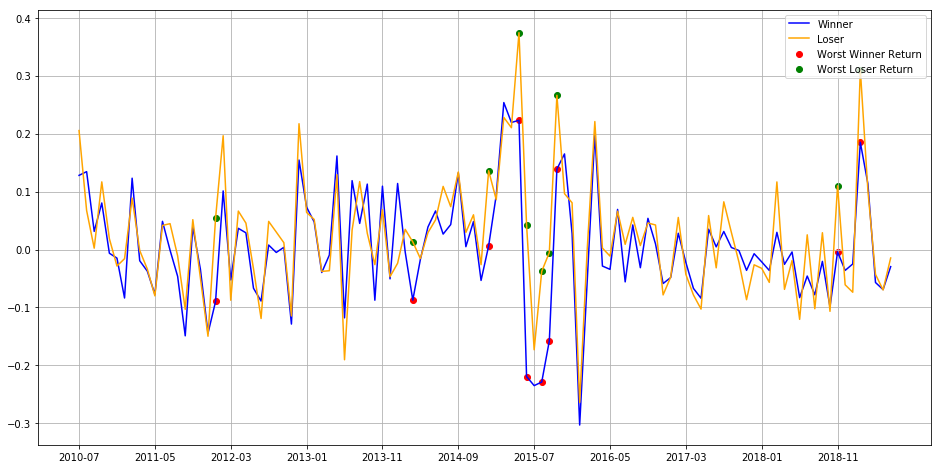

In [38]:
fig = plt.figure(figsize=(16,8))

plt.plot(sta['trdmnt'],sta['rwinner'], label='Winner', color='b')
plt.scatter(worst_winner['trdmnt'], worst_winner['rwinner'], color='r', label='Worst Winner Return')
plt.plot(sta['trdmnt'],sta['rloser_sameline'], label='Loser', color='orange')
plt.scatter(worst_winner['trdmnt'], worst_winner['rloser_sameline'], color='g', label='Worst Loser Return')
plt.grid(True)
plt.xticks(np.arange(0,109,10))
plt.legend(loc=1)
# plt.plot(np.arange(0,1000,1), np.ones(1000)*df[col].mean(), color='c', lw=3)

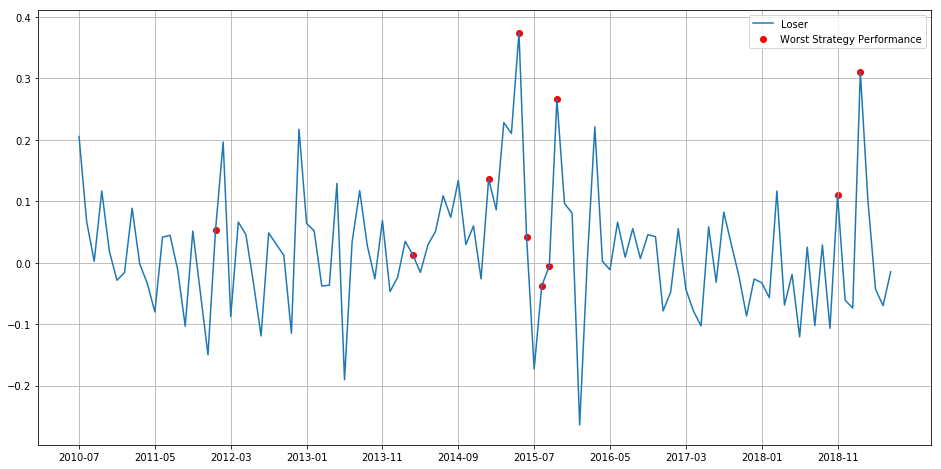

In [34]:
fig = plt.figure(figsize=(16,8))


plt.grid(True)
plt.xticks(np.arange(0,109,10))
plt.legend(loc=1)
# plt.plot(np.arange(0,1000,1), np.ones(1000)*df[col].mean(), color='c', lw=3)